# Linear Regression

### General idea:

Given a set of data points $\{x_1, \cdots, x_m\}$ associated to a set of outcomes $\{y_1, \cdots, y_m\}$ we want to build a model to predict $y$ from $x$.

### Hypothesis:

For a given input data $x_i$ the model we choose, noted $h_{\theta}$, prediction output is $h_{\theta}(x_i)$.

### Loss Function:

The loss functions is a function $L : (z,y) \in \mathbf{R} \times Y → L(z,y) \in \mathbf{R} $ that takes as inputs the predicted value $z$ corresponding to the real data value $y$ and outputs how different they are. For a linear regression the common loss functions is the Least squared error:

$$
\frac{1}{2}(y-z)^2.
$$

### Cost Function:

The cost function is often used to assess the performance of a model, it is defined as follows:

$$
J(\theta) = \sum_{i=1}^{m}L(h_{\theta}(x_i), y_i)
$$

### Model:

We assume that $y|x; \theta \sim \mathbf{N}(\mu, \sigma^2)$.

**Normal Equations** - Assuming $\mathbf{X}$ the design matrix, the value of $\theta$ that minimizes thwe cost function is a closed-form solution that:

$$
\theta = (X^TX)^{-1}X^Ty
$$

**LMS algorithm**: By noting $\alpha$ the learning rate, the update rule of the Leas Mean Squares (LMS) algorithm for a trainig set of m data points, ias as follows:

$$
\forall j, \theta_j ← \theta_j + \alpha\sum_{i=1}^{m}[y_i - h_{\theta}(x_i)]x_i^{(j)}.
$$

Ref: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning

# EXAMPLES

##Parameter Estimation for Non-linear equations

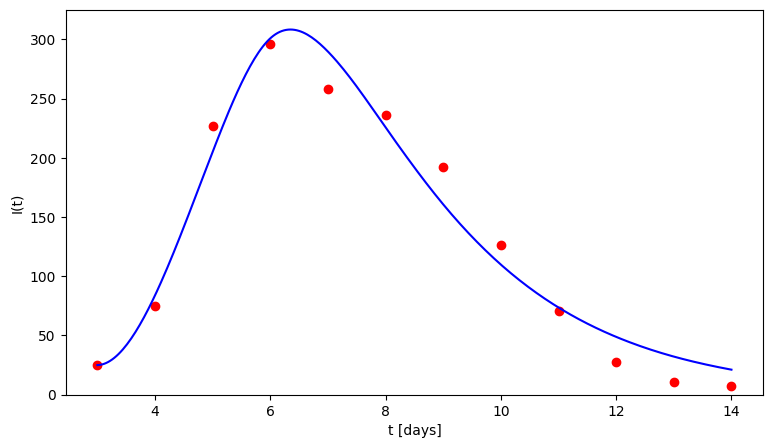

[2.37807185e-03 4.64860914e-01 7.63000000e+02]


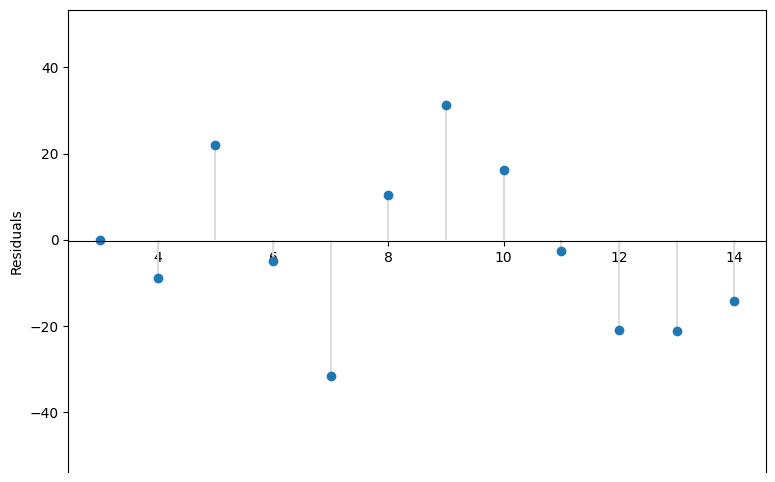

Tempo total: 0.9122829437255859 segundos


In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.interpolate import make_interp_spline, BSpline
import matplotlib.pyplot as plt
import time
import scipy.stats as stats
import pylab

#import matplotlib as mpl
inicio = time.time()

N = 763.0
ydata = ['25', '75', '227', '296', '258', '236', '192', '126', '71', '28', '11', '7']
ydata = [float(d) for d in ydata]
xdata = ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
xdata = [float(t) for t in xdata]
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)
I3, R3 = ydata[0], 0
S3 = N - I3 - R3
X3 = [S3,I3,R3]
beta, alpha = 0.0025, 0.3

def SIR_model(X, time, beta, alpha, N):
    S, I, R = X
    dSdt = -beta * S * I
    dIdt = beta * S * I - alpha * I
    dRdt = alpha * I
    return dSdt, dIdt, dRdt


def lsq(model, xdata, ydata, n):
    param_init = [beta, alpha, N]
    param = minimize(sse(model, X3, xdata, N, ydata, n), param_init, method="BFGS").x
    Nt = odeint(model, X3, xdata, args=tuple(param))
    return Nt[:,1], param

def sse(model, N0, xdata, N, ydata, n):
    def result(x):
        Nt = odeint(model, X3, xdata[:n], args=tuple(x))
        INt = [row[1] for row in Nt]
        difference = ydata[:n] - INt
        diff = np.dot(difference, difference)
        return diff
    return result

result = lsq(SIR_model, xdata, ydata, 60)[0]
params = lsq(SIR_model, xdata, ydata, 60)[1]
xnew = np.linspace(xdata.min(), xdata.max(), 300)
spl_result = make_interp_spline(xdata, result, k=3)
power_smooth_result = spl_result(xnew)

residuals =[] #variable to store the differences
n = len(ydata) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
    difference = ydata[i] - result[i]  #finding the difference between observed and predicted value
    residuals.append(difference)

fig1 = plt.figure(figsize=(9, 5))
#plt.grid()
#plt.title("Least Square Fit - BFGS Method")
plt.plot(xdata, ydata, 'o', color='red', label='Real Data')
plt.plot(xnew, power_smooth_result, 'b', label='Fit')
plt.xlabel('t [days]')
plt.ylabel('I(t)')
plt.ylim([0,325])
#plt.legend()
fig1.savefig('I_t_fit.jpg')


plt.show()
print(params)

fig2 = plt.figure(figsize=(9, 6))
ax = fig2.add_subplot()
#spines used to move the bottom axis to the center of the plot
ax.spines['bottom'].set_position('center')
plt.vlines(xdata, 0, residuals, 'gainsboro',linestyle="solid")
plt.plot(xdata, residuals, 'o', label='Residual')
#plt.grid()
#plt.title("Residuals")
#plt.xlabel('t [days]')
plt.ylabel('Residuals')
plt.ylim([min(residuals)*1.7,max(residuals)*1.7])
#plt.legend()
fig2.savefig('I_t_residuals.jpg')

plt.show()
fim = time.time()
tempo_total = fim - inicio
print("Tempo total:", tempo_total, "segundos")

Confidence Interval: 11.848516415037716


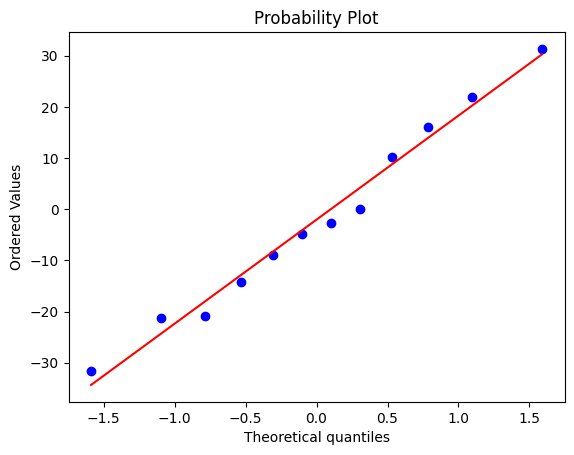

Lower bound: -0.19389540189402038
Upper bound: 0.20744595202165717
[0.37472655008101846, 0.09643352253788795]


In [ ]:
z_score = 1.96 #if n> 30
t_score = 2.145 #if n<30
RSS = np.sum(np.square(residuals))
n = len(ydata) #finding total number of items in list
MSE = RSS/(n-1)  #dividing summation by total values to obtain average
SD = np.sqrt(MSE)
CI = t_score*SD/np.sqrt(n)
print("Confidence Interval:", CI)
measurements = np.random.normal(loc = 20, scale = 5, size=12)
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()


def get_percentil_ci(residuals, confidence_level):
  """Calculates the percentual CI for the residual of a linear fit.

  Args:
    residuals: The residuals of the linear fit.
    confidence_level: The confidence level (e.g., 95%).

  Returns:
    The lower and upper bounds of the CI.
  """

  standard_deviation = np.std(residuals)
  z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
  lower_bound = np.mean(residuals) - z_score * standard_deviation
  upper_bound = np.mean(residuals) + z_score * standard_deviation
  return lower_bound, upper_bound

if __name__ == "__main__":
  residuals = np.random.normal(0, 0.1, 100)
  lower_bound, upper_bound = get_percentil_ci(residuals, 0.95)
  print("Lower bound:", lower_bound)
  print("Upper bound:", upper_bound)

beta = [4.64860951e-01*(1+lower_bound), 4.64860951e-01*(1+upper_bound)-4.64860951e-01]
print(beta)